# ReDo 01: Imrpovising random visualizations!
Nagaprakash Venkatesan

I came across these visualizations in Google's Foundations of Data Science course. To my surprise, they were part of the lesson and not any bad examples highlighted. So I decided to recreate them!     
*(I sourced the datasets as they were not shared in the course so reproductions may not be identical)*

**Image 01**:   
This image is misleading with respect to proportions and also the exact numbers.    
Many of the historical criticisms against a pie chart both in the acedamia and among professionals, will be valid for this one:-    
<img src="images/ReDo01.png">

**Solution:**    
We can visualize it simply using a bar chart or a line chart.

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("data/Redo.csv")

g = df.groupby('hr')['cnt'].mean()

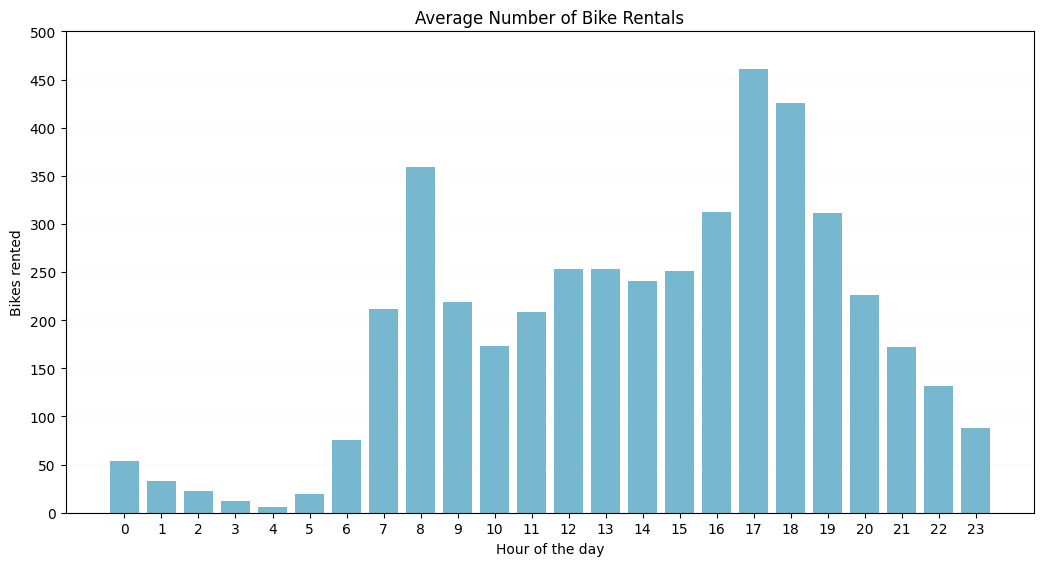

In [10]:
fig = plt.figure(figsize = (12.5, 6.25), facecolor='white')


plt.bar(g.index, g.values, color="#78B7D0")
plt.xticks(g.index)
plt.yticks(range(0, 501, 50))

plt.grid(axis='y', linewidth = .07)

plt.xlabel("Hour of the day")
plt.ylabel("Bikes rented")
plt.title("Average Number of Bike Rentals")

plt.savefig("ReDo01.png")

**Image 02**    
To begin with, the image has redundant information (temperature) and "a lot of ink" as Edward Tufte would put it.

<img src="images/ReDo02.png"> 

**Solution:**     
We can use heatmap or even some fancy visuzalization but let us make it better by simply "reducing the ink" !

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm

df = pd.read_csv("data/Redo.csv")

# This multiplication and subtraction are intentional/incorrect to make viz. identical
df['temp'] = df['temp']*60
df['temp'] = df['temp']-20

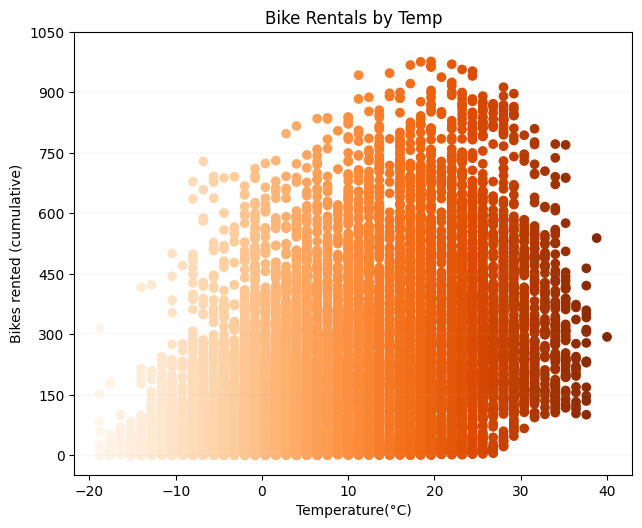

In [12]:
fig = plt.figure(figsize = (7.2, 5.75), facecolor='white')

plt.scatter(df.temp, df.cnt, c=df.temp, cmap=cm['Oranges'])

plt.yticks(range(0, 1051, 150))
plt.grid(axis='y', linewidth = .08)

plt.xlabel("Temperature(°C)")
plt.ylabel("Bikes rented (cumulative)")
plt.title("Bike Rentals by Temp")

plt.savefig("ReDo02.png")

## A non-sequentially coded or categorical example, using the same data.

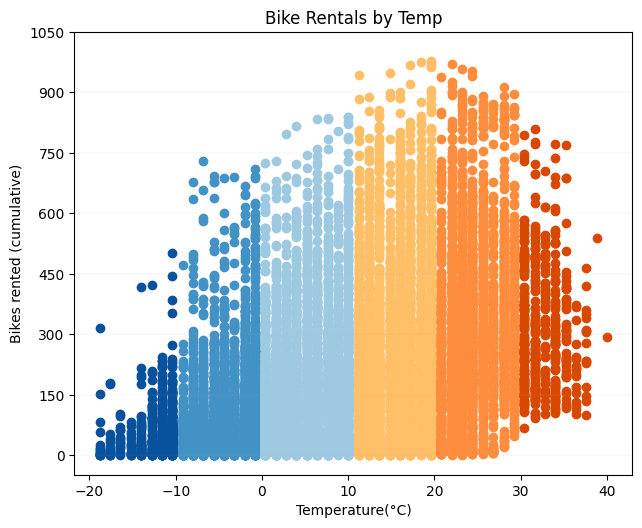

In [13]:
fig = plt.figure(figsize = (7.2, 5.75), facecolor='white')

# bins = range(0, 101, 10)
bins = range(-20, 51, 10)
df['bin'] = pd.cut(df['temp'], bins)

# colors = ["#08519c", "#4292c6", "#9ecae1", "#deebf7", "#f7f7f7", "#feebd8", "#ffd9aa", "#ffbf67", "#ffb03b", "#ffa500"]
colors = ["#08519c", "#4292c6", "#9ecae1", "#ffbf67", "#fd8d3c", '#d94801']

for b, c in zip(df['bin'].sort_values().unique(), colors):
    tf = df[df['bin']==b]
    plt.scatter(tf.temp, tf.cnt, color=c)

plt.yticks(range(0, 1051, 150))
plt.grid(axis='y', linewidth = .08)

plt.xlabel("Temperature(°C)")
plt.ylabel("Bikes rented (cumulative)")
plt.title("Bike Rentals by Temp")

plt.savefig("ReDo03.png")

The Dataset Used:- https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing/data